#Outlier Detection

## Univariate Outlier Detection

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from itertools import combinations
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
df = pd.read_csv('prog_book.csv')
print(df["Reviews"])
print(type(df["Reviews"][0]))
df["Reviews"] = df["Reviews"].str.replace(',', '').astype(int)
print(df["Reviews"])


0      3,829
1      1,406
2          0
3      1,658
4      1,325
       ...  
266        0
267       22
268       36
269        4
270        5
Name: Reviews, Length: 271, dtype: object
<class 'str'>
0      3829
1      1406
2         0
3      1658
4      1325
       ... 
266       0
267      22
268      36
269       4
270       5
Name: Reviews, Length: 271, dtype: int64


In [5]:
print(df.head())

   Rating  Reviews                                         Book_title  \
0    4.17     3829                              The Elements of Style   
1    4.01     1406      The Information: A History, a Theory, a Flood   
2    3.33        0       Responsive Web Design Overview For Beginners   
3    3.97     1658  Ghost in the Wires: My Adventures as the World...   
4    4.06     1325                                   How Google Works   

                                         Description  Number_Of_Pages  \
0  This style manual offers practical advice on i...              105   
1  James Gleick, the author of the best sellers C...              527   
2  In Responsive Web Design Overview For Beginner...               50   
3  If they were a hall of fame or shame for compu...              393   
4  Both Eric Schmidt and Jonathan Rosenberg came ...              305   

             Type      Price  
0       Hardcover   9.323529  
1       Hardcover  11.000000  
2  Kindle Edition  11.267647 

In [3]:
print(df["Type"].unique())

['Hardcover' 'Kindle Edition' 'Paperback' 'ebook' 'Unknown Binding'
 'Boxed Set - Hardcover']


In [6]:
df[['Price', 'Number_Of_Pages', 'Rating', 'Reviews']] = df[['Price', 'Number_Of_Pages', 'Rating', 'Reviews']].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=['Price', 'Number_Of_Pages', 'Rating', 'Reviews'])

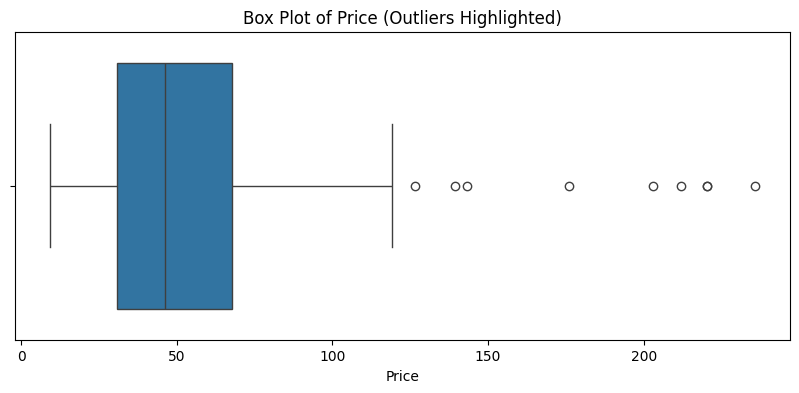

Outliers in Price:
          Price                                         Book_title
262  126.579412       Compilers: Principles, Techniques, and Tools
263  139.435294                            Game Programming Gems 4
264  143.138235                            Game Programming Gems 3
265  176.144118  Numerical Recipes: The Art of Scientific Compu...
266  203.108823  3D Game Engine Architecture: Engineering Real-...
267  212.097059                An Introduction to Database Systems
268  220.385294  The Art of Computer Programming, Volumes 1-3 B...
269  220.385294  The Art of Computer Programming, Volumes 1-4a ...
270  235.650000              A Discipline for Software Engineering 



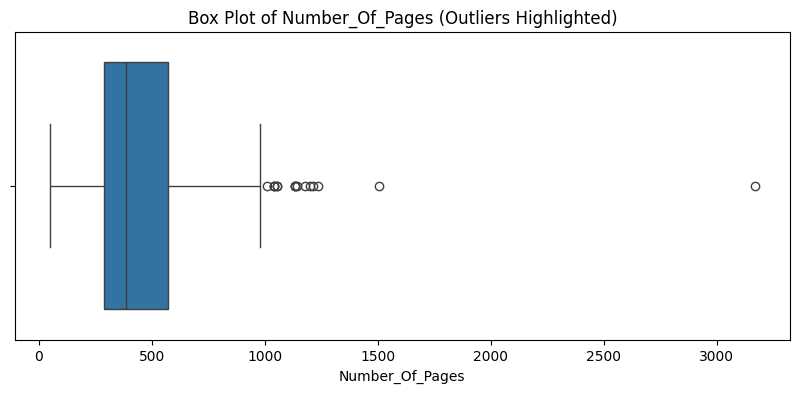

Outliers in Number_Of_Pages:
     Number_Of_Pages                                         Book_title
86              1200                                   Beginning Java 2
129             1008  PHP and MySQL Web Development (Developer's Lib...
137             1506  The Linux Programming Interface: A Linux and U...
203             1214                                    Learning Python
206             1040                       The C++ Programming Language
232             1142                           Database System Concepts
240             1180                         Introduction to Algorithms
245             1052                           Game Engine Architecture
249             1056              Geometric Tools for Computer Graphics
253             1136              Modern Operating Systems, 4th Edition
258             1136  The C++ Standard Library: A Tutorial and Refer...
259             1132         Artificial Intelligence: A Modern Approach
260             1040  3D Game Engin

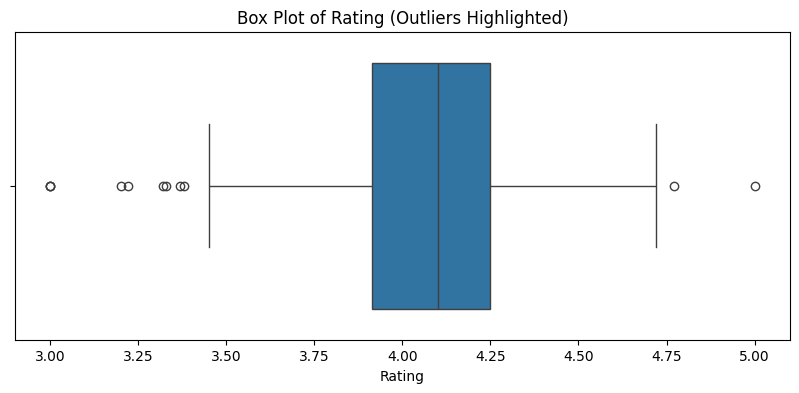

Outliers in Rating:
     Rating                                         Book_title
2      3.33       Responsive Web Design Overview For Beginners
24     3.20                      Game Programming Golden Rules
54     5.00                            Your First App: Node.js
60     3.32         Sams Teach Yourself JavaScript in 24 Hours
86     3.22                                   Beginning Java 2
94     3.38               Sams Teach Yourself Perl in 24 Hours
132    3.37                     Unity Virtual Reality Projects
177    3.00  Advanced Game Programming: A Gamedev.Net Colle...
182    3.00  Cross-Platform Game Programming (Game Developm...
187    3.00  Lambda-Calculus, Combinators and Functional Pr...
269    4.77  The Art of Computer Programming, Volumes 1-4a ... 



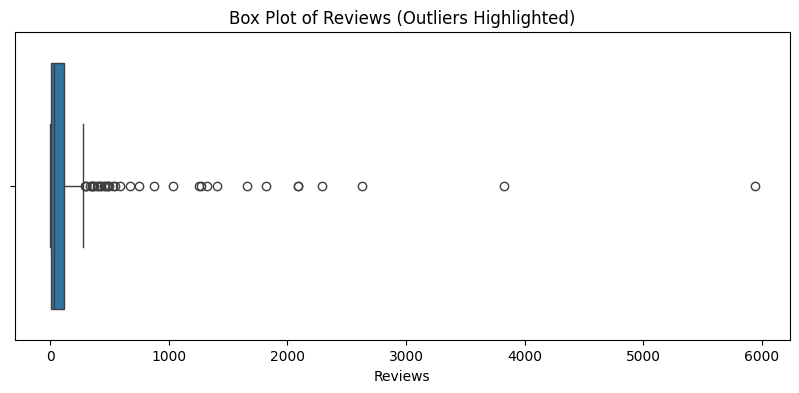

Outliers in Reviews:
     Reviews                                         Book_title
0       3829                              The Elements of Style
1       1406      The Information: A History, a Theory, a Flood
3       1658  Ghost in the Wires: My Adventures as the World...
4       1325                                   How Google Works
6       5938  Start with Why: How Great Leaders Inspire Ever...
7       1817  Algorithms to Live By: The Computer Science of...
8       2093  Weapons of Math Destruction: How Big Data Incr...
11       481  The Master Algorithm: How the Quest for the Ul...
13      1255      Superintelligence: Paths, Dangers, Strategies
14       593  The Art of the Start: The Time-Tested, Battle-...
15       417  Kingpin: How One Hacker Took Over the Billion-...
18       370  Our Final Invention: Artificial Intelligence a...
19      2092  The Innovators: How a Group of Hackers, Genius...
21       676  Big Data: A Revolution That Will Transform How...
23      1268  The C

In [7]:
vars = ['Price', 'Number_Of_Pages', 'Rating', 'Reviews']
for var in vars:
    plt.figure(figsize=(10, 4))
    q1, q3 = df[var].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[var] < lower) | (df[var] > upper)][[var, 'Book_title']]
    sns.boxplot(x=df[var])
    plt.title(f'Box Plot of {var} (Outliers Highlighted)')
    plt.show()
    print(f"Outliers in {var}:")
    print(outliers, "\n")

## Multivariate Outlier Detection

### Bivariate Outliers Using DBSCAN (eps=0.8, min_samples=4)


#### Plotting Outliers and Combining non-outlier clusters

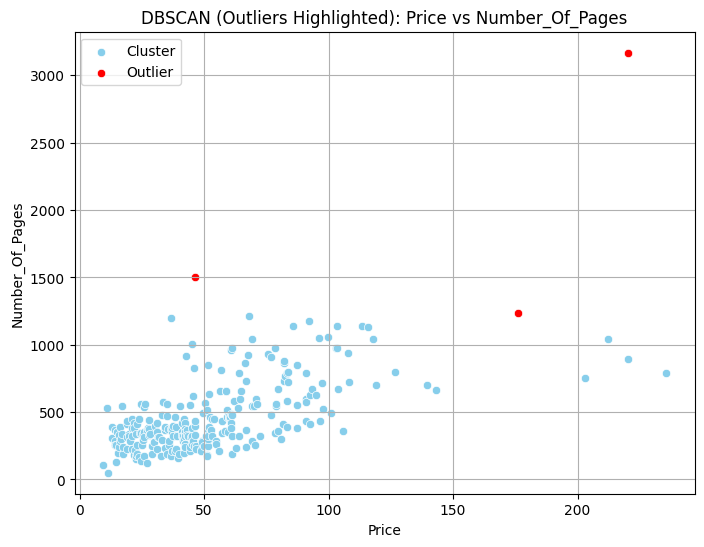

Outliers for Price vs Number_Of_Pages:
   index       Price  Number_Of_Pages
0    137   46.358824             1506
1    265  176.144118             1235
2    269  220.385294             3168 



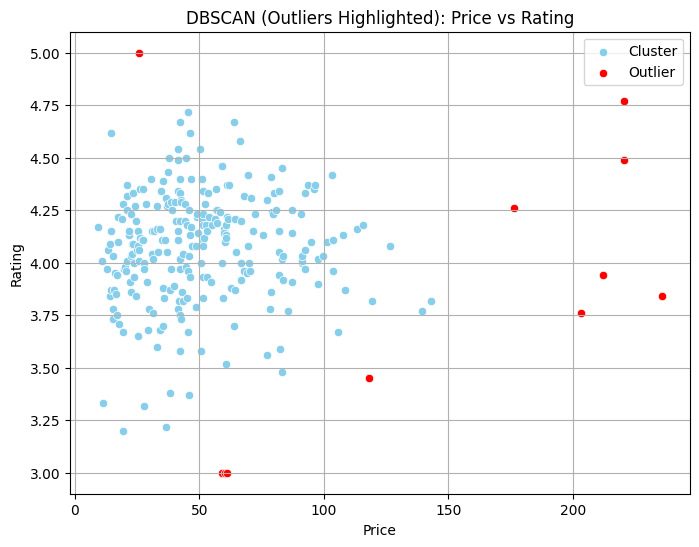

Outliers for Price vs Rating:
    index       Price  Rating
0      54   25.855882    5.00
1     177   59.082353    3.00
2     182   60.391176    3.00
3     187   61.167647    3.00
4     260  117.988235    3.45
5     265  176.144118    4.26
6     266  203.108823    3.76
7     267  212.097059    3.94
8     268  220.385294    4.49
9     269  220.385294    4.77
10    270  235.650000    3.84 



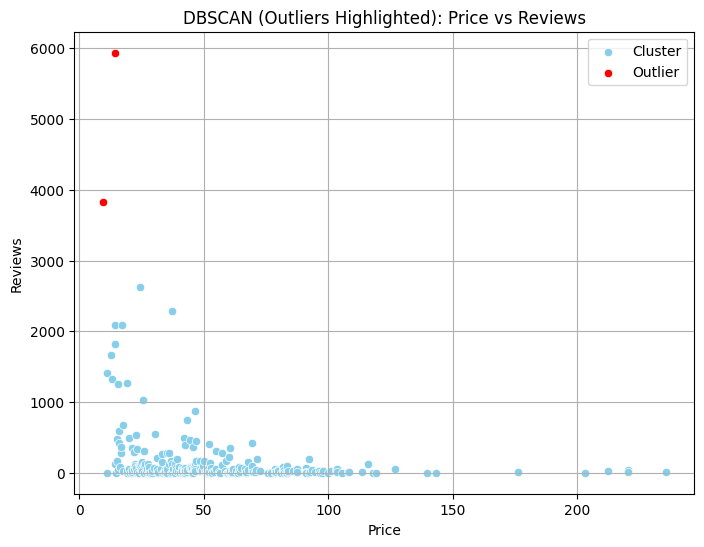

Outliers for Price vs Reviews:
   index      Price  Reviews
0      0   9.323529     3829
1      6  14.232353     5938 



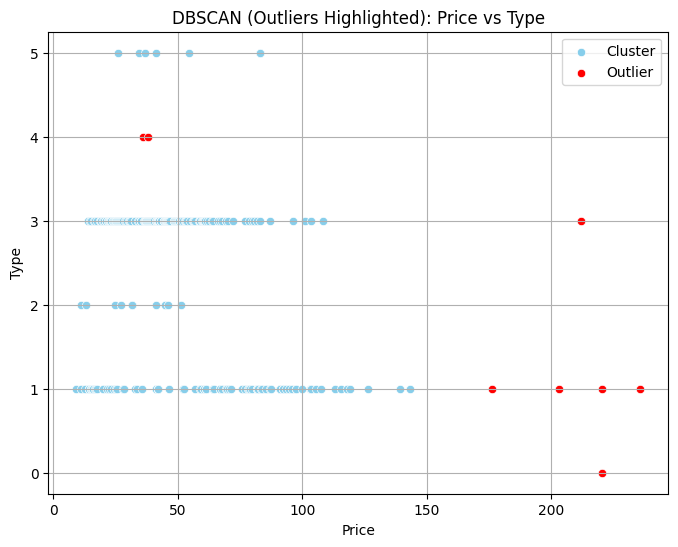

Outliers for Price vs Type:
   index       Price  Type
0     85   36.126471     4
1     95   38.297059     4
2    265  176.144118     1
3    266  203.108823     1
4    267  212.097059     3
5    268  220.385294     0
6    269  220.385294     1
7    270  235.650000     1 



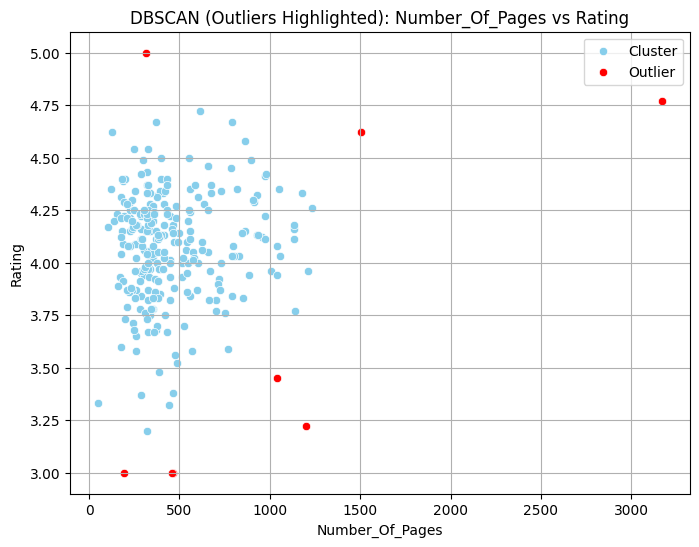

Outliers for Number_Of_Pages vs Rating:
   index  Number_Of_Pages  Rating
0     54              317    5.00
1     86             1200    3.22
2    137             1506    4.62
3    177              464    3.00
4    182              460    3.00
5    187              192    3.00
6    260             1040    3.45
7    269             3168    4.77 



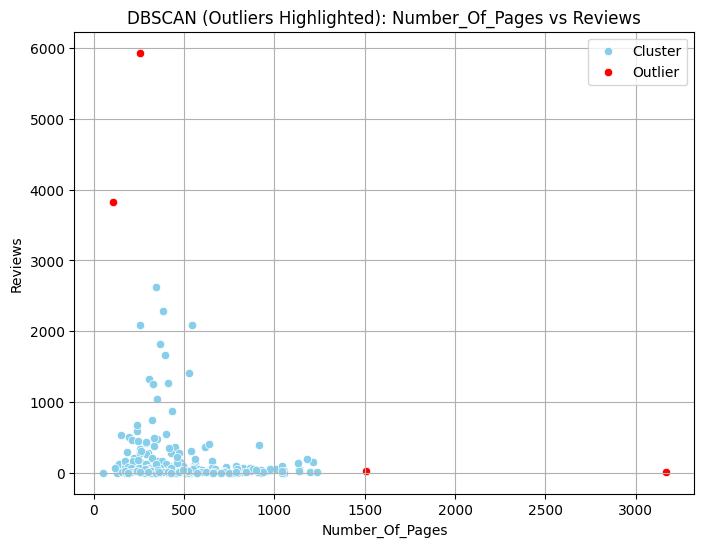

Outliers for Number_Of_Pages vs Reviews:
   index  Number_Of_Pages  Reviews
0      0              105     3829
1      6              256     5938
2    137             1506       28
3    269             3168        4 



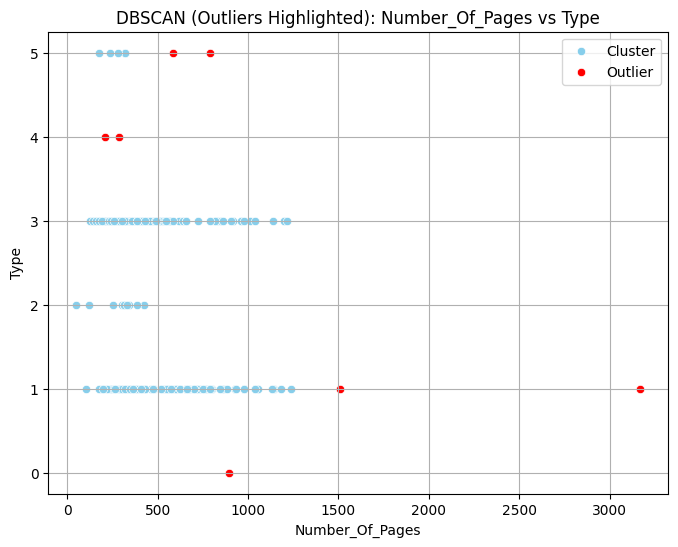

Outliers for Number_Of_Pages vs Type:
   index  Number_Of_Pages  Type
0     85              288     4
1     95              210     4
2    137             1506     1
3    228              787     5
4    229              582     5
5    268              896     0
6    269             3168     1 



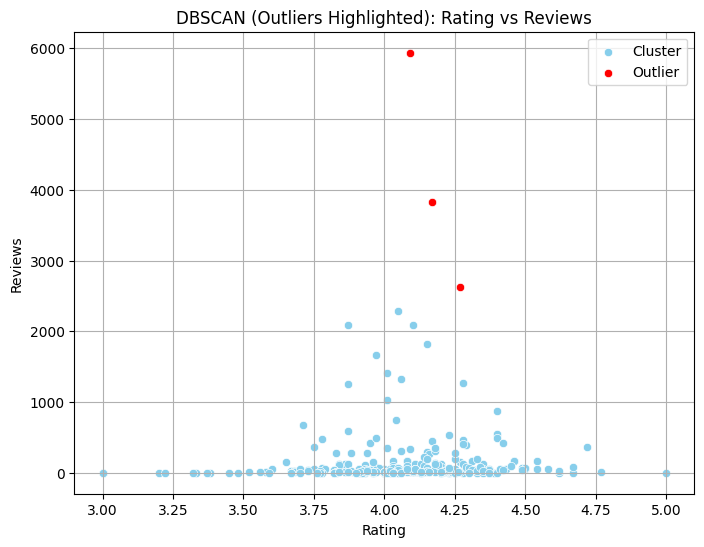

Outliers for Rating vs Reviews:
   index  Rating  Reviews
0      0    4.17     3829
1      6    4.09     5938
2     45    4.27     2629 



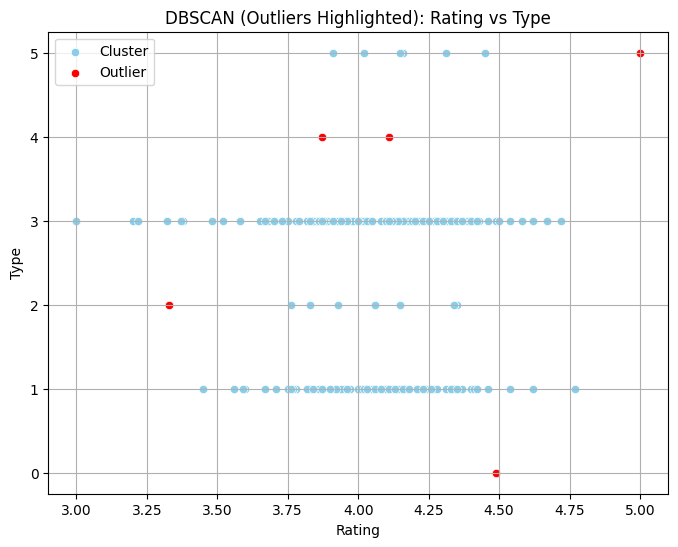

Outliers for Rating vs Type:
   index  Rating  Type
0      2    3.33     2
1     54    5.00     5
2     85    4.11     4
3     95    3.87     4
4    268    4.49     0 



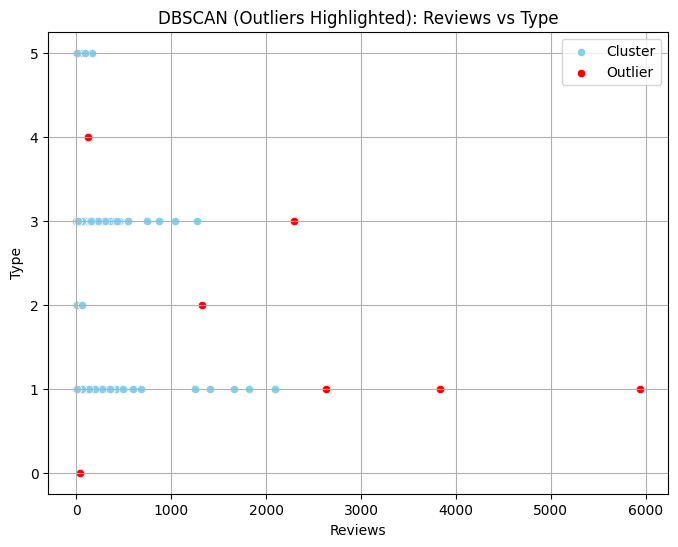

Outliers for Reviews vs Type:
   index  Reviews  Type
0      0     3829     1
1      4     1325     2
2      6     5938     1
3     45     2629     1
4     85      125     4
5     90     2290     3
6     95      122     4
7    268       36     0 



In [8]:
from matplotlib.colors import ListedColormap

df['Type'] = df['Type'].astype(str)
df['Type'] = LabelEncoder().fit_transform(df['Type'])
df = df.dropna(subset=['Price', 'Number_Of_Pages', 'Rating', 'Reviews', 'Type'])

features = ['Price', 'Number_Of_Pages', 'Rating', 'Reviews', 'Type']

for combo in combinations(features, 2):
    X = df[list(combo)].values
    X_scaled = StandardScaler().fit_transform(X)

    db = DBSCAN(eps=0.8, min_samples=4)
    labels = db.fit_predict(X_scaled)
    vis_df = df.copy()
    vis_df['Cluster'] = labels

    plt.figure(figsize=(8, 6))

    sns.scatterplot(
        data=vis_df[vis_df['Cluster'] != -1],
        x=combo[0],
        y=combo[1],
        color='skyblue',
        label='Cluster'
    )

    sns.scatterplot(
        data=vis_df[vis_df['Cluster'] == -1],
        x=combo[0],
        y=combo[1],
        color='red',
        label='Outlier'
    )

    plt.title(f"DBSCAN (Outliers Highlighted): {combo[0]} vs {combo[1]}")
    plt.legend()
    plt.grid()
    plt.show()

    outliers = vis_df[vis_df['Cluster'] == -1]
    print(f"Outliers for {combo[0]} vs {combo[1]}:")
    print(outliers[[combo[0], combo[1]]].reset_index(), "\n")

### Three Variable Analysis (eps=1.4, min_samples=4)

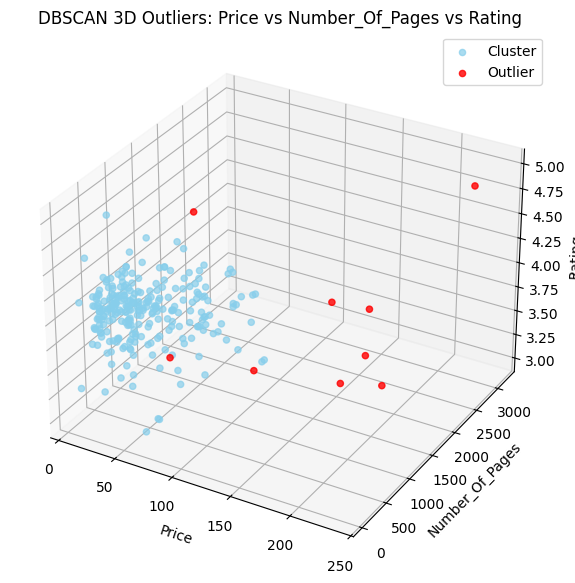

Outliers for Price vs Number_Of_Pages vs Rating:
   index       Price  Number_Of_Pages  Rating
0     86   36.617647             1200    3.22
1    137   46.358824             1506    4.62
2    260  117.988235             1040    3.45
3    265  176.144118             1235    4.26
4    266  203.108823              752    3.76
5    267  212.097059             1040    3.94
6    268  220.385294              896    4.49
7    269  220.385294             3168    4.77
8    270  235.650000              789    3.84 



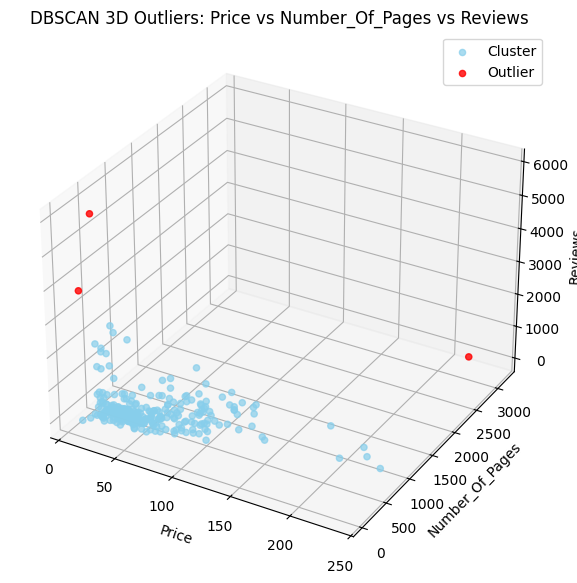

Outliers for Price vs Number_Of_Pages vs Reviews:
   index       Price  Number_Of_Pages  Reviews
0      0    9.323529              105     3829
1      6   14.232353              256     5938
2    269  220.385294             3168        4 



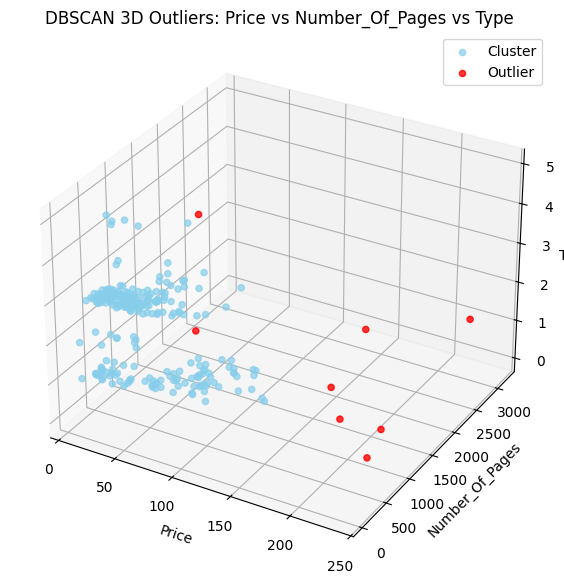

Outliers for Price vs Number_Of_Pages vs Type:
   index       Price  Number_Of_Pages  Type
0    137   46.358824             1506     1
1    228   83.202941              787     5
2    265  176.144118             1235     1
3    266  203.108823              752     1
4    267  212.097059             1040     3
5    268  220.385294              896     0
6    269  220.385294             3168     1
7    270  235.650000              789     1 



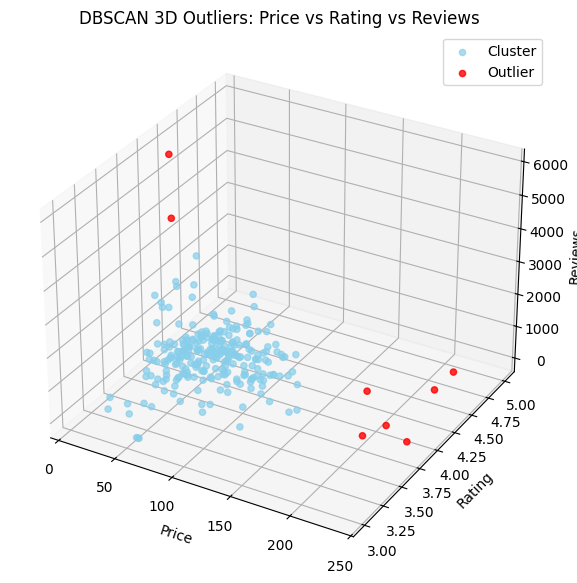

Outliers for Price vs Rating vs Reviews:
   index       Price  Rating  Reviews
0      0    9.323529    4.17     3829
1      6   14.232353    4.09     5938
2    265  176.144118    4.26        5
3    266  203.108823    3.76        0
4    267  212.097059    3.94       22
5    268  220.385294    4.49       36
6    269  220.385294    4.77        4
7    270  235.650000    3.84        5 



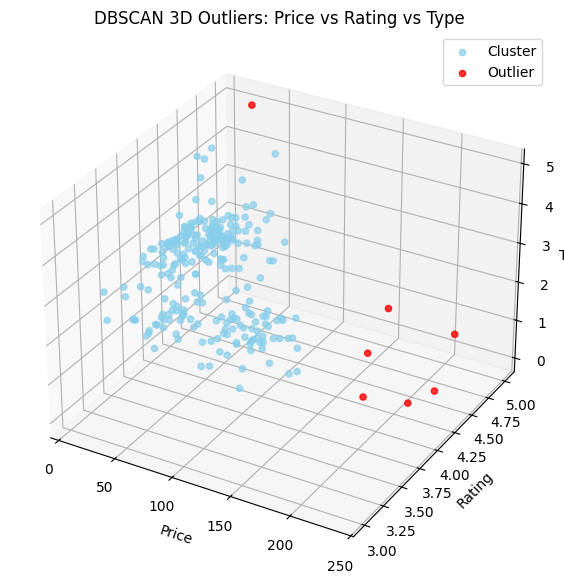

Outliers for Price vs Rating vs Type:
   index       Price  Rating  Type
0     54   25.855882    5.00     5
1    265  176.144118    4.26     1
2    266  203.108823    3.76     1
3    267  212.097059    3.94     3
4    268  220.385294    4.49     0
5    269  220.385294    4.77     1
6    270  235.650000    3.84     1 



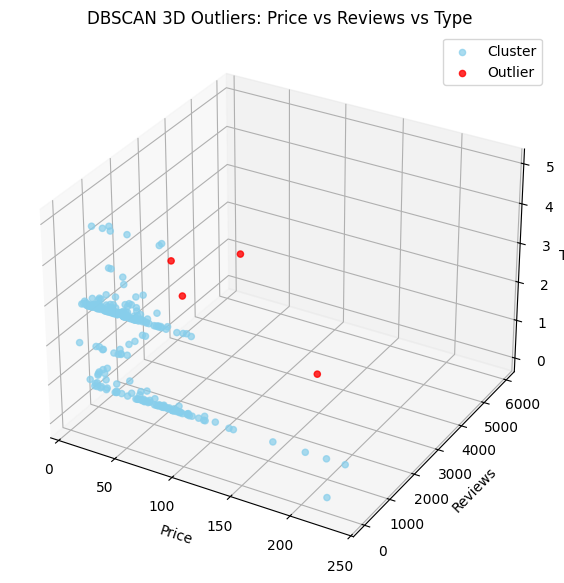

Outliers for Price vs Reviews vs Type:
   index       Price  Reviews  Type
0      0    9.323529     3829     1
1      6   14.232353     5938     1
2     90   37.141176     2290     3
3    267  212.097059       22     3 



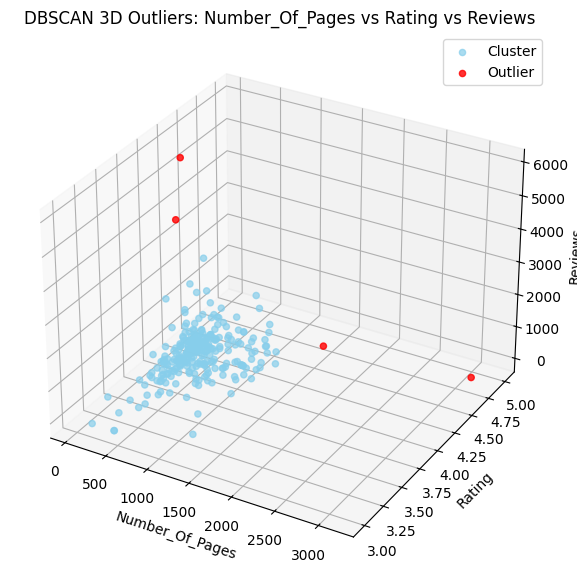

Outliers for Number_Of_Pages vs Rating vs Reviews:
   index  Number_Of_Pages  Rating  Reviews
0      0              105    4.17     3829
1      6              256    4.09     5938
2    137             1506    4.62       28
3    269             3168    4.77        4 



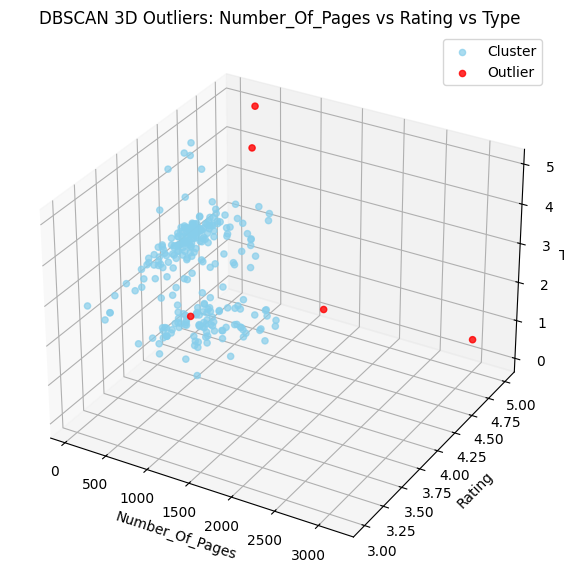

Outliers for Number_Of_Pages vs Rating vs Type:
   index  Number_Of_Pages  Rating  Type
0     54              317    5.00     5
1     86             1200    3.22     3
2    137             1506    4.62     1
3    228              787    4.45     5
4    269             3168    4.77     1 



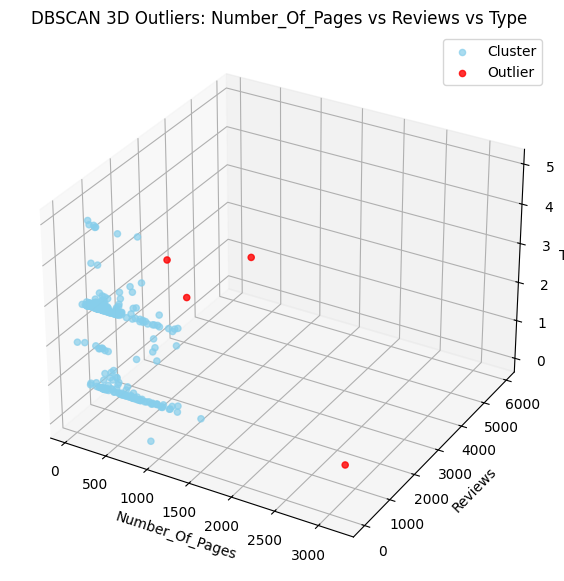

Outliers for Number_Of_Pages vs Reviews vs Type:
   index  Number_Of_Pages  Reviews  Type
0      0              105     3829     1
1      6              256     5938     1
2     90              384     2290     3
3    269             3168        4     1 



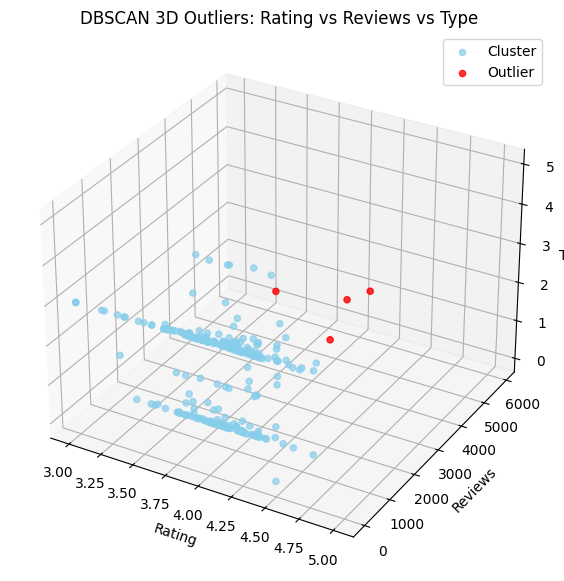

Outliers for Rating vs Reviews vs Type:
   index  Rating  Reviews  Type
0      0    4.17     3829     1
1      6    4.09     5938     1
2     54    5.00        0     5
3     90    4.05     2290     3 



In [9]:
for combo in combinations(features, 3):
    curr_data = df[list(combo)].values
    scaled = StandardScaler().fit_transform(curr_data)
    dbscan_model = DBSCAN(eps=1.4, min_samples=4)
    cluster_labels = dbscan_model.fit_predict(scaled)
    vis_df = df.copy()
    vis_df['Cluster'] = cluster_labels
    clustered = vis_df[vis_df['Cluster'] != -1]
    detected_outliers = vis_df[vis_df['Cluster'] == -1]
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(
        clustered[combo[0]],
        clustered[combo[1]],
        clustered[combo[2]],
        c='skyblue',
        label='Cluster',
        alpha=0.7
    )

    ax.scatter(
        detected_outliers[combo[0]],
        detected_outliers[combo[1]],
        detected_outliers[combo[2]],
        c='red',
        label='Outlier',
        alpha=0.8
    )
    ax.set_xlabel(combo[0])
    ax.set_ylabel(combo[1])
    ax.set_zlabel(combo[2])
    plt.title(f"DBSCAN 3D Outliers: {combo[0]} vs {combo[1]} vs {combo[2]}")
    ax.legend()
    plt.show()

    print(f"Outliers for {combo[0]} vs {combo[1]} vs {combo[2]}:")
    print(detected_outliers[[combo[0], combo[1], combo[2]]].reset_index(), "\n")